In [6]:
import os

In [7]:
my_data_dir = 'cell_images/'

In [8]:
os.listdir(my_data_dir)

['train', 'test']

In [9]:
import tensorflow as tf

In [10]:
tf.test.is_gpu_available()

True

In [11]:
print(len(tf.config.list_physical_devices('GPU')))

1


In [12]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [13]:
train_path = my_data_dir + '/train/'

In [14]:
pwd

'/home/krishna/deep_learning/TF_2_Notebooks_and_Data/04-CNNs'

In [15]:
train_path

'cell_images//train/'

In [16]:
test_path = my_data_dir + '/test/'

In [17]:
test_path

'cell_images//test/'

In [18]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [19]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [34]:
os.listdir(train_path + '//parasitized')[0]

'C68P29N_ThinF_IMG_20150819_133236_cell_208.png'

In [35]:
para_cell = train_path+'/parasitized'+'/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [36]:
para_img = imread(para_cell)

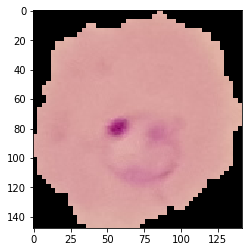

In [37]:
plt.imshow(para_img)

In [38]:
para_img.shape

(148, 142, 3)

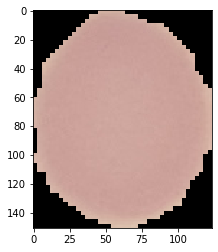

In [44]:
unifected_cell_path = train_path+'/uninfected/'+os.listdir(train_path+'/uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [45]:
unifected_cell.shape

(151, 124, 3)

In [46]:
len(os.listdir(train_path + '/parasitized'))

12480

In [48]:
len(os.listdir(train_path + '/uninfected'))

12480

In [49]:
len(os.listdir(test_path + '/uninfected'))

1300

In [51]:
len(os.listdir(test_path + '/parasitized'))

1300

In [54]:
# finding the average of the image
dim1 = []
dim2 = []
for file_name in os.listdir(test_path+'/uninfected'):
    img = imread(test_path + '/uninfected/'+ file_name)
    d1,d2,color = img.shape
    dim1.append(d1)
    dim2.append(d2)

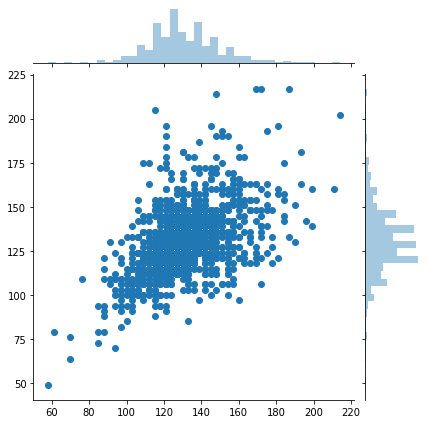

In [55]:
sns.jointplot(dim1,dim2)

In [56]:
np.mean(dim1)

130.92538461538462

In [57]:
np.mean(dim2)

130.75

In [58]:
#makng the image size to the average
image_shape = (130,130,3)

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [63]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               #rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

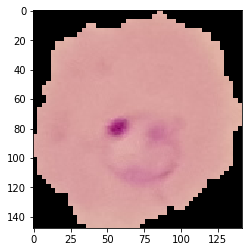

In [65]:
plt.imshow(para_img)

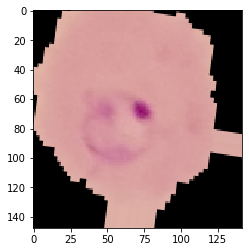

In [71]:
plt.imshow(image_gen.random_transform(para_img))

In [75]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [77]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [79]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [85]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],#(130, 130, 3)
                                                color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [86]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                              target_size=image_shape[:2],
                                              color_mode = 'rgb',
                                              batch_size = 16,
                                              class_mode='binary')

Found 2600 images belonging to 2 classes.


In [87]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1560 steps, validate for 163 steps
Epoch 1/20
1560/1560 [==============================] - 119s 76ms/step - loss: 0.6740 - accuracy: 0.5890 - val_loss: 0.6832 - val_accuracy: 0.5635
Epoch 2/20
1560/1560 [==============================] - 113s 72ms/step - loss: 0.6705 - accuracy: 0.5988 - val_loss: 0.6643 - val_accuracy: 0.6150
Epoch 3/20
1560/1560 [==============================] - 114s 73ms/step - loss: 0.6898 - accuracy: 0.6059 - val_loss: 0.6814 - val_accuracy: 0.5638
Epoch 4/20
1560/1560 [==============================] - 114s 73ms/step - loss: 0.4380 - accuracy: 0.7928 - val_loss: 0.2670 - val_accuracy: 0.9162
Epoch 5/20
1560/1560 [==============================] - 108s 69ms/step - loss: 0.2314 - accuracy: 0.9273 - val_loss: 0.1971 - val_accuracy: 0.9362
Epoch 6/20
1560/1560 [==============================] - 111s 71ms/step - loss: 0.1992 - accuracy: 0.9407 - val_loss: 0.1753 - val_accuracy: 0.9423
Epoch 7/20
1560/1560 [=

In [123]:
losses = pd.DataFrame(model.history.history)

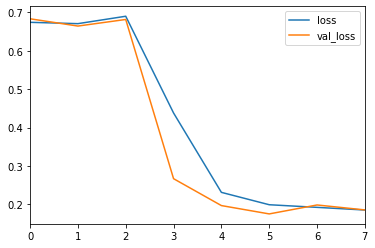

In [124]:
losses[['loss', 'val_loss']].plot()

In [110]:
model.evaluate_generator(test_image_gen)

  ...
    to  
  ['...']


[0.1883141187368178, 0.94]

In [125]:
from tensorflow.keras.preprocessing import image

In [126]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

In [127]:
pred_probabilities

array([[1.7115256e-03],
       [7.1836495e-01],
       [4.0263988e-04],
       ...,
       [9.3751150e-01],
       [9.6120673e-01],
       [1.1180186e-01]], dtype=float32)

In [128]:
predictions = pred_probabilities > 0.5

In [129]:
predictions

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [130]:
from sklearn.metrics import classification_report,confusion_matrix

In [131]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.52      0.51      0.51      1300
           1       0.52      0.52      0.52      1300

    accuracy                           0.52      2600
   macro avg       0.52      0.52      0.52      2600
weighted avg       0.52      0.52      0.52      2600



In [100]:
confusion_matrix(test_image_gen.classes,predictions)

array([[455, 845],
       [465, 835]])

In [101]:
my_image = image.load_img(para_cell,target_size=image_shape)

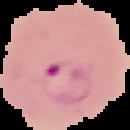

In [102]:
my_image

In [103]:
my_image = image.img_to_array(my_image)

In [104]:
my_image = np.expand_dims(my_image, axis=0)

In [105]:
my_image.shape

(1, 130, 130, 3)

In [106]:
model.predict(my_image)

array([[0.5079795]], dtype=float32)